In [1]:
## Load data
import glob
import pandas as pd
import pickle

# group = 'gender'
# group = 'age'
group = 'race'
df = pd.read_csv(r'/home/hbt/jchr_data/jchr_racial_diff/results/preprocessed_data/1_2_model_input_ws60min_ph60min_v6.csv')




# Define the path to your folder
folder_path = rf'/home/hbt/jchr_data/jchr_racial_diff/results/processed_data/2_1_1_predicted_results_rnn_v6_{group}'

# Pattern to match the files
file_pattern = f'{folder_path}/patient*_ratio*.pkl'

# Dictionary to store the data
dictionary = {}

# Iterate over files matched by glob
for file_path in glob.glob(file_pattern):
    with open(file_path, 'rb') as file:
        # Extracting N and X from the filename
        filename = file_path.split('/')[-1]  # Adjust if necessary based on your OS
        patient_id, ratio_id = filename.replace('.pkl', '').split('_')
        # Extracting numeric parts from patient_id and ratio_id
        patient_num = ''.join(filter(str.isdigit, patient_id))
        ratio_num = ''.join(filter(str.isdigit, ratio_id))
        
        # Load the content of the file
        file_data = pickle.load(file)

        # Store the data
        dictionary.update(file_data)

# Now loaded_data contains all your files' data
outer_keys = dictionary.keys()
print("Outer keys:", list(outer_keys))
inner_keys = dictionary[(172, 100)].keys()
print("Inner keys:", list(inner_keys))

Outer keys: [(27, 0), (102, 80), (33, 70), (93, 20), (143, 20), (70, 50), (9, 10), (186, 40), (175, 100), (126, 10), (15, 60), (124, 90), (165, 30), (56, 40), (217, 80), (4, 90), (6, 10), (189, 40), (231, 90), (54, 0), (129, 10), (59, 40), (116, 50), (25, 20), (85, 70), (83, 100), (155, 70), (31, 0), (192, 90), (190, 10), (130, 40), (126, 100), (173, 60), (40, 10), (203, 50), (88, 0), (99, 90), (212, 30), (108, 30), (76, 100), (1, 20), (78, 60), (149, 90), (12, 50), (202, 0), (121, 20), (181, 70), (51, 70), (160, 80), (78, 0), (96, 90), (94, 10), (34, 40), (107, 30), (146, 90), (212, 100), (144, 10), (138, 70), (180, 100), (222, 70), (198, 20), (48, 20), (25, 100), (137, 70), (197, 20), (47, 20), (174, 50), (214, 0), (82, 40), (22, 10), (20, 90), (111, 60), (61, 30), (152, 40), (213, 100), (154, 10), (67, 60), (156, 90), (84, 10), (86, 90), (24, 40), (156, 0), (131, 20), (191, 70), (125, 0), (159, 90), (68, 60), (89, 90), (202, 30), (118, 30), (8, 70), (142, 40), (71, 30), (92, 40), (1

### Extract one PtID with one ratio from dictionary

In [2]:
import numpy as np

path_seg_csv = "/home/hbt/miniforge3/envs/env_study1_v3/lib/python3.11/site-packages/methcomp/static/seg.csv"

data = np.loadtxt(path_seg_csv)

y_actual = dictionary[(4,20)]['y_actual']
y_pred = dictionary[(4, 20)]['y_pred']

n = 18

ref = y_actual * n
pred = y_pred * n
pred = np.clip(pred, None, 599)
print(
    np.shape(ref),
    np.shape(pred),
    print(y_actual.max())
)
# from . import static  # temporary fix


i = 0
for p, r in zip(pred, ref):
    print(i ,int(p), int(r))
    print(i, data.T[int(p), int(r)])
    print("---")
    i += 1


print("Number of values above 600:",np.sum(pred > 600))    
#data = np.loadtxt(pkg_resources.open_text(static, "seg.csv"))
# _zones = np.array([data.T[int(p), int(t)] for p, t in zip(pred, ref)])

_zones = np.array(data.T[int(p), int(t)] for p, t in zip(pred, ref))

#print(int(y_pred))


# print(_zones)

27.65486725663717
(672, 1) (672, 1) None
0 295 362
0 0.40712
---
1 348 365
1 0.17557
---
2 317 386
2 0.17812
---
3 375 403
3 0.28499
---
4 346 417
4 0.46056
---
5 351 418
5 0.31298
---
6 412 399
6 0.31552
---
7 395 371
7 0.0076336
---
8 414 347
8 0.52672
---
9 387 324
9 0.21883
---
10 334 295
10 0.29771
---
11 298 267
11 0.063613
---
12 291 246
12 0.31552
---
13 259 231
13 0.28499
---
14 217 222
14 0.012723
---
15 202 210
15 0.0
---
16 195 197
16 0.0
---
17 190 186
17 0.0
---
18 194 177
18 0.48092
---
19 180 184
19 0.37405
---
20 170 231
20 0.64631
---
21 163 300
21 0.89822
---
22 156 355
22 1.2621
---
23 195 358
23 0.84987
---
24 303 337
24 0.0025445
---
25 368 330
25 0.2112
---
26 379 327
26 0.2112
---
27 290 322
27 0.23155
---
28 271 325
28 0.23919
---
29 313 327
29 0.0
---
30 300 313
30 0.20102
---
31 297 313
31 0.22901
---
32 320 312
32 0.0
---
33 312 295
33 0.29008
---
34 269 313
34 0.26972
---
35 309 366
35 0.17812
---
36 288 471
36 0.75064
---
37 247 497
37 0.96183
---
38 345 4

/tmp/ipykernel_1222255/991320426.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(i ,int(p), int(r))
/tmp/ipykernel_1222255/991320426.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(i, data.T[int(p), int(r)])


In [3]:
ref.dtype

dtype('float64')

In [4]:
[data.T[int(p), int(t)] for p, t in zip(pred, ref)]

/tmp/ipykernel_1222255/352313238.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  [data.T[int(p), int(t)] for p, t in zip(pred, ref)]


[0.40712,
 0.17557,
 0.17812,
 0.28499,
 0.46056,
 0.31298,
 0.31552,
 0.0076336,
 0.52672,
 0.21883,
 0.29771,
 0.063613,
 0.31552,
 0.28499,
 0.012723,
 0.0,
 0.0,
 0.0,
 0.48092,
 0.37405,
 0.64631,
 0.89822,
 1.2621,
 0.84987,
 0.0025445,
 0.2112,
 0.2112,
 0.23155,
 0.23919,
 0.0,
 0.20102,
 0.22901,
 0.0,
 0.29008,
 0.26972,
 0.17812,
 0.75064,
 0.96183,
 0.51399,
 0.11959,
 0.51399,
 0.053435,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.050891,
 0.36641,
 0.37405,
 0.0,
 0.24173,
 0.15013,
 0.23155,
 0.23919,
 0.29771,
 0.31043,
 0.30789,
 0.33842,
 0.81425,
 1.2392,
 0.99237,
 0.51908,
 0.41985,
 0.035623,
 0.0,
 0.51399,
 1.2188,
 1.4198,
 1.4504,
 1.0992,
 1.0127,
 1.0992,
 0.53181,
 0.33333,
 0.6972,
 0.0,
 0.0050891,
 0.4402,
 0.3715,
 0.015267,
 0.21374,
 0.32061,
 0.21883,
 0.14758,
 0.31298,
 0.22646,
 0.74809,
 1.1196,
 0.71756,
 0.61323,
 0.23919,
 0.50891,
 0.45293,
 0.38422,
 0.40712,
 0.17557,
 0.18066,
 0.2112,
 0.50636,
 0.35369,
 0.28499,
 0.33842,
 0.34351,
 0.44529,
 0.01

In [5]:
np.shape(data)

(600, 600)

In [12]:
# y_actual = dictionary[(4, 0)]['y_actual']
# y_pred = dictionary[(4, 0)]['y_pred']

import numpy as np
print('max:',np.max(y_actual))
print('min:',np.min(y_actual))

max: 27.65486725663717
min: 2.8761061946902657


SEG scores: [0.40712   0.17557   0.17812   0.28499   0.46056   0.31298   0.31552
 0.0076336 0.52672   0.21883   0.29771   0.063613  0.3028    0.28499
 0.02799   0.20611   0.        0.0076336 0.48092   0.39949   0.64631
 0.89822   1.2621    0.84987   0.23664   0.1883    0.53435   0.
 0.22901   0.        0.22901   0.22901   0.        0.29008   0.26972
 0.17812   0.75064   0.96183   0.51399   0.11959   0.053435  0.053435
 0.        0.        0.        0.        0.        0.050891  0.36641
 0.37405   0.        0.24173   0.35115   0.23664   0.26972   0.29771
 0.31043   0.30789   0.33842   0.81425   0.97201   0.99237   0.51908
 0.55216   0.0050891 0.086514  0.71501   1.2239    1.4198    1.4504
 1.0025    0.53181   1.0992    0.40204   0.33333   0.6972    0.0076336
 0.53435   0.41221   0.025445  0.17557   0.21374   0.32061   0.21883
 0.022901  0.33333   0.20611   0.74809   1.2188    0.71756   0.24682
 0.23919   0.50891   0.45293   0.38931   0.40712   0.17557   0.18066
 0.1883    0.50636   0.35

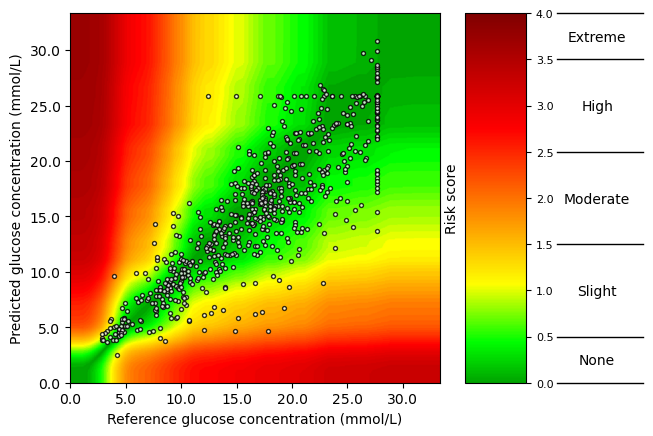

SEG scores: [0.40712   0.17557   0.17812   0.28499   0.46056   0.31298   0.31552
 0.0076336 0.52672   0.21883   0.29771   0.063613  0.3028    0.28499
 0.02799   0.20611   0.        0.0076336 0.48092   0.39949   0.64631
 0.89822   1.2621    0.84987   0.23664   0.1883    0.53435   0.
 0.22901   0.        0.22901   0.22901   0.        0.29008   0.26972
 0.17812   0.75064   0.96183   0.51399   0.11959   0.053435  0.053435
 0.        0.        0.        0.        0.        0.050891  0.36641
 0.37405   0.        0.24173   0.35115   0.23664   0.26972   0.29771
 0.31043   0.30789   0.33842   0.81425   0.97201   0.99237   0.51908
 0.55216   0.0050891 0.086514  0.71501   1.2239    1.4198    1.4504
 1.0025    0.53181   1.0992    0.40204   0.33333   0.6972    0.0076336
 0.53435   0.41221   0.025445  0.17557   0.21374   0.32061   0.21883
 0.022901  0.33333   0.20611   0.74809   1.2188    0.71756   0.24682
 0.23919   0.50891   0.45293   0.38931   0.40712   0.17557   0.18066
 0.1883    0.50636   0.35

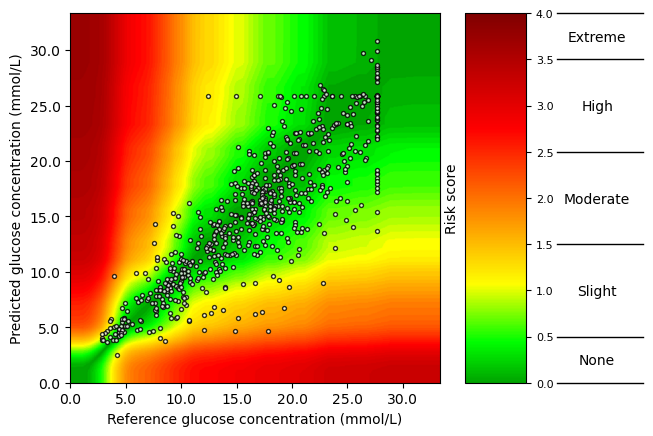

In [ ]:
y_actual = dictionary[(4, 0)]['y_actual']
y_pred = dictionary[(4, 0)]['y_pred']

from random import uniform

import matplotlib.pyplot as plt

from methcomp import seg, segscores

zones = segscores(y_actual, y_pred, units="mmol")
print("SEG scores: {}".format(zones))

seg(y_actual, y_pred, units="mmol", percentage=False)
plt.show()

In [7]:
import my_utils
import numpy as np
iteration = 1
dict_results = {}

for (PtID, percentage), value in dictionary.items():
    

    # print('Iteration:',iteration,'PtID:',PtID,'ratio:' ,percentage)
    iteration=iteration+1
    print('patient ID: ',PtID, 'ratio: ', percentage)
    # My actual/true values and my baseline value
    y_actual = value['y_actual']
    y_last_value = value['y_last_val']
    y_pred_single = value['y_pred_single']
    y_pred_base = value['y_pred']
    y_pred_tl = value['y_pred_tl']
    y_last_value2 = y_last_value.values.reshape(-1, 1) # make y_last_val to nparray (672,1) from Series (672,)
    

    zones_base = segscores(y_actual, y_pred_base, units="mmol")
    zones_naive = segscores(y_actual, y_last_value, units="mmol")
    zones_single = segscores(y_actual, y_pred_single, units="mmol")
    zones_tl = segscores(y_actual, y_pred_tl, units="mmol")
     
    dict_results[(PtID, percentage)] = {
        "ptid_test": value['PtId_test'],
        "ptid_group": value['ptid_group'],
        "zones_naive": zones_naive,
        "zones_single": zones_single,
        "zones_base": zones_base,
        "zones_tl": zones_tl
    
    }


patient ID:  27 ratio:  0
patient ID:  102 ratio:  80


patient ID:  33 ratio:  70
patient ID:  93 ratio:  20
patient ID:  143 ratio:  20
patient ID:  70 ratio:  50
patient ID:  9 ratio:  10
patient ID:  186 ratio:  40
patient ID:  175 ratio:  100
patient ID:  126 ratio:  10
patient ID:  15 ratio:  60
patient ID:  124 ratio:  90
patient ID:  165 ratio:  30
patient ID:  56 ratio:  40
patient ID:  217 ratio:  80
patient ID:  4 ratio:  90
patient ID:  6 ratio:  10
patient ID:  189 ratio:  40
patient ID:  231 ratio:  90
patient ID:  54 ratio:  0
patient ID:  129 ratio:  10
patient ID:  59 ratio:  40
patient ID:  116 ratio:  50
patient ID:  25 ratio:  20
patient ID:  85 ratio:  70
patient ID:  83 ratio:  100
patient ID:  155 ratio:  70
patient ID:  31 ratio:  0
patient ID:  192 ratio:  90
patient ID:  190 ratio:  10
patient ID:  130 ratio:  40
patient ID:  126 ratio:  100
patient ID:  173 ratio:  60
patient ID:  40 ratio:  10
patient ID:  203 ratio:  50
patient ID:  88 ratio:  0
patient ID:  99 ratio:  90
patient ID:  212 ratio:  30
patient ID: 

KeyboardInterrupt: 

In [ ]:
y_pred_base3 =np.clip(y_pred_base, None, 599)
y_pred_base3*18

array([[103.99949 ],
       [114.86646 ],
       [104.54686 ],
       [ 83.55886 ],
       [ 79.78705 ],
       [ 82.76103 ],
       [ 77.44231 ],
       [ 81.74789 ],
       [130.63374 ],
       [110.268456],
       [ 91.630226],
       [117.62091 ],
       [114.012474],
       [ 79.293   ],
       [ 86.52659 ],
       [102.81948 ],
       [ 93.9503  ],
       [ 97.313255],
       [135.33485 ],
       [124.5995  ],
       [141.64453 ],
       [146.33768 ],
       [133.70364 ],
       [115.31468 ],
       [110.33364 ],
       [117.302505],
       [114.54143 ],
       [119.57446 ],
       [139.64285 ],
       [181.64859 ],
       [246.38754 ],
       [215.56729 ],
       [188.75606 ],
       [206.91447 ],
       [235.34198 ],
       [234.9255  ],
       [227.00978 ],
       [258.02216 ],
       [235.14421 ],
       [226.10257 ],
       [220.51967 ],
       [196.00078 ],
       [184.60011 ],
       [164.69113 ],
       [176.92726 ],
       [180.86801 ],
       [188.04831 ],
       [181.5

In [ ]:
file_path = f"/home/hbt/jchr_data/jchr_racial_diff/results/processed_data/3_3_calculated_zones/3_3_calculated_zones_v6_{group}.pkl"
        
        
with open(file_path, 'wb') as file:
# Serialize and save the list to the file
    pickle.dump(dict_results, file)
        

In [ ]:
    
import my_utils
import numpy as np
iteration = 1
dict_zones = {}
dict_counts = {}
def replace_values_in_intervals(arr, intervals):
    """
    Replace values within specified intervals in a NumPy array.
    
    Parameters:
    - arr (numpy.ndarray): The array to modify.
    - intervals (list of tuples): Each tuple contains three elements (lower_bound, upper_bound, new_value).
    
    Returns:
    - numpy.ndarray: The modified array with replaced values.
    """
    # Ensure the array is a numpy array
    arr = np.array(arr)
    
    for lower, upper, new_value in intervals:
        arr[(arr >= lower) & (arr < upper)] = new_value
        
    return arr

def count_values(arr, values):
    """
    Count occurrences of specific values in a NumPy array.

    Parameters:
    - arr (numpy.ndarray): The array to inspect.
    - values (list): A list of values to count in the array.

    Returns:
    - Multiple integer counts corresponding to each value in the 'values' list.
    """
    counts = [np.count_nonzero(arr == value) for value in values]
    return tuple(counts)  # Return counts as a tuple

intervals = [(0.0, 0.5, 0),(0.5, 1.5, 1), (1.5, 2.5, 2), (2.5, 3.5, 3), (3.5, 4, 4)]
# Intervals (lower limit, upper limit, new value)
values_to_count = [0, 1, 2, 3, 4]

for (PtID, percentage), value in dictionary.items():
    
    if PtID == 4:
        continue

    # print('Iteration:',iteration,'PtID:',PtID,'ratio:' ,percentage)
    iteration=iteration+1
    print('patient ID: ',PtID, 'ratio: ', percentage)
    # My actual/true values and my baseline value
    y_actual = value['y_actual']
    y_last_value = value['y_last_val']
    y_pred_single = value['y_pred_single']
    y_pred_base = value['y_pred']
    y_pred_tl = value['y_pred_tl']
    y_last_value2 = y_last_value.values.reshape(-1, 1) # make y_last_val to nparray (672,1) from Series (672,)
        
        
    zones_base = segscores(y_actual, y_pred_base, units="mmol")
    zones_naive = segscores(y_actual, y_last_value, units="mmol")
    zones_single = segscores(y_actual, y_pred_single, units="mmol")
    zones_tl = segscores(y_actual, y_pred_tl, units="mmol")
    
    
    zones_modified_base = replace_values_in_intervals(zones_base, intervals)
    zones_modified_naive = replace_values_in_intervals(zones_naive, intervals)
    zones_modified_single = replace_values_in_intervals(zones_single, intervals)
    zones_modified_tl = replace_values_in_intervals(zones_tl, intervals)
    
    counts_none_base, counts_slight_base, counts_moderate_base, counts_high_base, counts_extreme_base = count_values(zones_modified_base, values_to_count)
    counts_none_naive, counts_slight_naive, counts_moderate_naive, counts_high_naive, counts_extreme_naive = count_values(zones_modified_naive, values_to_count)
    counts_none_single, counts_slight_single, counts_moderate_single, counts_high_single, counts_extreme_single = count_values(zones_modified_single, values_to_count) 
    counts_none_tl, counts_slight_tl, counts_moderate_tl, counts_high_tl, counts_extreme_tl = count_values(zones_modified_tl, values_to_count)
    
    dict_zones[(PtID, percentage)] = {
        "ptid_test": value['PtId_test'],
        "ptid_group": value['ptid_group'],
        "zones_naive": zones_naive,
        "zones_single": zones_single,
        "zones_base": zones_base,
        "zones_tl": zones_tl
    }    
    dict_counts[(PtID, percentage)] = {
        "ptid_test": value['PtId_test'],
        "ptid_group": value['ptid_group'],
        "counts_none_naive": counts_none_naive,
        "counts_slight_naive": counts_slight_naive,
        "counts_moderate_naive": counts_moderate_naive,
        "counts_high_naive": counts_high_naive,
        "counts_extreme_naive": counts_extreme_naive,
        "counts_none_single": counts_none_single,
        "counts_slight_single": counts_slight_single,
        "counts_moderate_single": counts_moderate_single,
        "counts_high_single": counts_high_single,
        "counts_extreme_single": counts_extreme_single,
        "counts_none_base": counts_none_base,
        "counts_slight_base": counts_slight_base,
        "counts_moderate_base": counts_moderate_base,
        "counts_high_base": counts_high_base,
        "counts_extreme_base": counts_extreme_base,
        "counts_none_tl": counts_none_tl,
        "counts_slight_tl": counts_slight_tl,
        "counts_moderate_tl": counts_moderate_tl,
        "counts_high_tl": counts_high_tl,
        "counts_extreme_tl": counts_extreme_tl
         
         
    
    }

patient ID:  27 ratio:  0
patient ID:  102 ratio:  80
patient ID:  33 ratio:  70
patient ID:  93 ratio:  20
patient ID:  143 ratio:  20
patient ID:  70 ratio:  50
patient ID:  9 ratio:  10
patient ID:  186 ratio:  40
patient ID:  175 ratio:  100
patient ID:  126 ratio:  10
patient ID:  15 ratio:  60
patient ID:  124 ratio:  90
patient ID:  165 ratio:  30
patient ID:  56 ratio:  40
patient ID:  217 ratio:  80
patient ID:  6 ratio:  10
patient ID:  189 ratio:  40
patient ID:  231 ratio:  90
patient ID:  54 ratio:  0
patient ID:  129 ratio:  10
patient ID:  59 ratio:  40
patient ID:  116 ratio:  50
patient ID:  25 ratio:  20
patient ID:  85 ratio:  70
patient ID:  83 ratio:  100
patient ID:  155 ratio:  70
patient ID:  31 ratio:  0
patient ID:  192 ratio:  90
patient ID:  190 ratio:  10
patient ID:  130 ratio:  40
patient ID:  126 ratio:  100
patient ID:  173 ratio:  60
patient ID:  40 ratio:  10
patient ID:  203 ratio:  50
patient ID:  88 ratio:  0
patient ID:  99 ratio:  90
patient ID: 

In [ ]:
import pandas as pd
df_counts = pd.DataFrame.from_dict(dict_counts, orient='index').reset_index()
df_counts = df_counts.rename(columns={'level_0': 'PtID', 'level_1': 'ratio'})
df_counts


file_path_save = f'../results/processed_data/3_3_calculated_zones/3_3_calculated_zones_v6_{group}.csv'
df_counts.to_csv(file_path_save)

# with 15 zones

In [ ]:
import pandas as pd
import numpy as np

iteration = 1
zones_df = pd.DataFrame()
counts_df = pd.DataFrame()

def replace_values_in_intervals(arr, intervals):
    arr = np.array(arr)
    for lower, upper, new_value in intervals:
        arr[(arr >= lower) & (arr < upper)] = new_value
    return arr

def count_values(arr, values):
    counts = [np.count_nonzero(arr == value) for value in values]
    return tuple(counts)
intervals [(-0.5, 0.5, 0), (-0.5, -1, -1) (-1,0,-1,5, -2), (-1,5, -2, -3), (-2, -2.5, -4), (-2.5, -3, -5), (-3, -3.5, -6), (-3.5, -4, -7),(),(), (), (), (), (), ()]
intervals = [(0.0, 0.5, 0),(0.5, 1.5, 1), (1.5, 2.5, 2), (2.5, 3.5, 3), (3.5, 4, 4)]
values_to_count = [0, 1, 2, 3, 4]

for (PtID, percentage), value in dictionary.items():
    if PtID == 4:
        continue

    iteration += 1
    y_actual = value['y_actual']
    y_last_value = value['y_last_val']
    y_pred_single = value['y_pred_single']
    y_pred_base = value['y_pred']
    y_pred_tl = value['y_pred_tl']
    y_last_value2 = y_last_value.values.reshape(-1, 1)

    zones_base = segscores(y_actual, y_pred_base, units="mmol")
    zones_naive = segscores(y_actual, y_last_value, units="mmol")
    zones_single = segscores(y_actual, y_pred_single, units="mmol")
    zones_tl = segscores(y_actual, y_pred_tl, units="mmol")

    zones_modified_base = replace_values_in_intervals(zones_base, intervals)
    zones_modified_naive = replace_values_in_intervals(zones_naive, intervals)
    zones_modified_single = replace_values_in_intervals(zones_single, intervals)
    zones_modified_tl = replace_values_in_intervals(zones_tl, intervals)

    counts_none_base, counts_slight_base, counts_moderate_base, counts_high_base, counts_extreme_base = count_values(zones_modified_base, values_to_count)
    counts_none_naive, counts_slight_naive, counts_moderate_naive, counts_high_naive, counts_extreme_naive = count_values(zones_modified_naive, values_to_count)
    counts_none_single, counts_slight_single, counts_moderate_single, counts_high_single, counts_extreme_single = count_values(zones_modified_single, values_to_count) 
    counts_none_tl, counts_slight_tl, counts_moderate_tl, counts_high_tl, counts_extreme_tl = count_values(zones_modified_tl, values_to_count)

    zones_row = {
        "PtID": PtID,
        "percentage": percentage,
        "ptid_test": value['PtId_test'],
        "ptid_group": value['ptid_group'],
        "zones_naive": zones_naive,
        "zones_single": zones_single,
        "zones_base": zones_base,
        "zones_tl": zones_tl
    }
    
    counts_row = {
        "PtID": PtID,
        "percentage": percentage,
        "ptid_test": value['PtId_test'],
        "ptid_group": value['ptid_group'],
        "counts_none_naive": counts_none_naive,
        "counts_slight_naive": counts_slight_naive,
        "counts_moderate_naive": counts_moderate_naive,
        "counts_high_naive": counts_high_naive,
        "counts_extreme_naive": counts_extreme_naive,
        "counts_none_single": counts_none_single,
        "counts_slight_single": counts_slight_single,
        "counts_moderate_single": counts_moderate_single,
        "counts_high_single": counts_high_single,
        "counts_extreme_single": counts_extreme_single,
        "counts_none_base": counts_none_base,
        "counts_slight_base": counts_slight_base,
        "counts_moderate_base": counts_moderate_base,
        "counts_high_base": counts_high_base,
        "counts_extreme_base": counts_extreme_base,
        "counts_none_tl": counts_none_tl,
        "counts_slight_tl": counts_slight_tl,
        "counts_moderate_tl": counts_moderate_tl,
        "counts_high_tl": counts_high_tl,
        "counts_extreme_tl": counts_extreme_tl
    }

    zones_df = zones_df.append(zones_row, ignore_index=True)
    counts_df = counts_df.append(counts_row, ignore_index=True)
